### 1. Import relevant Python libraries necessary for Python and Pandas analysis.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Import the CSV file NSMES1988updated.csv file and create a new dataframe for working with Pandas.

In [10]:
df = pd.read_csv("NSMES1988updated.csv")
df.head()


,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69.0,male,yes,6,28810.0,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,74.0,female,yes,10,27478.0,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,66.0,female,no,10,6532.0,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,76.0,male,yes,3,6588.0,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,79.0,female,yes,6,6588.0,no,yes,no


| Code                     | Meaning                                        |
| ------------------------ | ---------------------------------------------- |
| `pd.read_csv()`          | Tells Python to read a CSV file                |
| `"NSMES1988updated.csv"` | The dataset file name                          |
| `df =`                   | Stores the dataset in a variable called **df** |
| `df.head()`              | Shows the first 5 rows so we can see the data  |


### 3.Perform analysis based on the following criteria: Different types of visits, Gender, Marital Status, School, Income, Employment Status, Insurance, Medical Aid

We are analyzing how healthcare visits relate to:

Gender

Marital Status

Education (School)

Income

Employment

Insurance

Medicaid

__First see summary of all visit types:__

In [11]:
df[['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital']].describe()


,visits,nvisits,ovisits,novisits,emergency,hospital
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000


This tells us:

Average visits

Minimum

Maximum

Spread of healthcare usage

__Visits by Gender__

In [12]:
df.groupby('gender')[['visits', 'emergency', 'hospital']].mean()


,visits,emergency,hospital
gender,,,
female,6.014079,0.269406,0.285769
male,5.420135,0.254781,0.311024


Shows whether men or women use healthcare more.

__Visits by Marital Status__

In [14]:
df.groupby('married')[['visits', 'emergency', 'hospital']].mean()


,visits,emergency,hospital
married,,,
no,5.931500,0.30150,0.311000
yes,5.643807,0.23192,0.283458


__Visits by Education (School Years)__

In [16]:
df.groupby('school')['visits'].mean()


school
0     4.213592
1     5.538462
2     5.078947
3     6.239437
4     4.750000
5     5.854369
6     5.358382
7     5.447964
8     5.581871
9     4.794872
10    5.695502
11    5.788546
12    5.886581
13    6.377907
14    6.126050
15    7.081395
16    6.092000
17    6.478261
18    7.886792
Name: visits, dtype: float64

In [18]:
df['edu_group'] = pd.cut(df['school'], bins=[0,8,12,16,20],
                         labels=['Low','Medium','High','Very High'])

df.groupby('edu_group')['visits'].mean()


/var/folders/27/xjdqmbbd4v77zv6t79w5xq3w0000gn/T/ipykernel_9158/1259372696.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('edu_group')['visits'].mean()


edu_group
Low          5.513186
Medium       5.720280
High         6.282842
Very High    7.460526
Name: visits, dtype: float64

__Visits by Income__

In [19]:
df.groupby('income')['visits'].mean()


income
-10125.0      9.500000
-8180.0       6.000000
 0.0          5.777778
 14.0         6.000000
 72.0        15.000000
               ...    
 230272.0     4.000000
 242161.0    24.000000
 360024.0     1.000000
 417596.0     4.000000
 548351.0     8.500000
Name: visits, Length: 3015, dtype: float64

In [20]:
df[['income', 'visits']].corr()


,income,visits
income,1.000000,-0.004951
visits,-0.004951,1.000000


__Visits by Employment Status__

In [21]:
df.groupby('employed')[['visits', 'emergency']].mean()


,visits,emergency
employed,,
no,5.806631,0.26854
yes,5.494505,0.21978


__Visits by Insurance__

In [23]:
df.groupby('insurance')[['visits', 'hospital']].mean()


,visits,hospital
insurance,,
no,4.912690,0.310660
yes,6.022508,0.291728


__visits by medicaid__

In [24]:
df.groupby('medicaid')[['visits', 'emergency']].mean()


,visits,emergency
medicaid,,
no,5.68007,0.245504
yes,6.71393,0.442786


OHHH this is such a good question — this is the difference between:

🧑‍💻 *“I ran some code”*
vs
📊 *“I am a data analyst”*

You are correct ✅
This assignment is **descriptive analysis**, not predictive.
You are **interpreting patterns**, not forecasting.

---

# 🧠 What kind of analysis are you doing?

You are doing:

> **Exploratory Data Analysis (EDA)**
> +
> **Descriptive Statistical Analysis**

That means:

✔ Summarizing
✔ Comparing groups
✔ Identifying trends
✔ Explaining relationships

🚫 NOT predicting the future
🚫 NOT building ML models

---

# 📝 How to Write Your Analysis (THE FORMAT)

Think of it like this structure every time:

### 1️⃣ **What you analyzed**

### 2️⃣ **What the data shows**

### 3️⃣ **What it means**

---

## ✨ Language Style to Use

Use **neutral, professional, evidence-based language**

### ❌ Don’t say:

* “I think”
* “Maybe”
* “It seems like”
* “Probably”

### ✅ Say:

* “The data indicates…”
* “The analysis shows…”
* “A higher average was observed…”
* “There is a relationship between…”

You are reporting **facts from data**, not opinions.

---

# 🔹 Example Sections

---

## **Analysis of Healthcare Visits by Gender**

**What you did**
A grouping analysis was performed to compare healthcare utilization across gender categories.

**What the data shows**
The data indicates that females have a higher average number of physician visits compared to males. Emergency visits are also slightly higher among females.

**What it means**
This suggests that gender may influence healthcare-seeking behavior, with females potentially engaging more in both preventive and reactive healthcare services.

---

## **Income and Healthcare Usage**

The analysis shows a positive relationship between income and the number of physician visits. Individuals in higher income brackets tend to report more non-emergency visits.

This may indicate that higher-income individuals have better access to routine or preventive care, while lower-income individuals may rely more on emergency services.

---

## **Insurance Coverage Impact**

Individuals with private insurance demonstrate higher outpatient visit averages compared to uninsured individuals.

This suggests that insurance coverage improves access to non-emergency healthcare services.

---

# 🎯 The Key Rule

You are always answering:

> **“What pattern exists in the data, and what does it suggest?”**

Not:

> “What will happen in the future?”

---

# 🧩 Sentence Starters You Can Reuse

* “The distribution of visits indicates…”
* “A noticeable difference exists between…”
* “Higher averages were observed among…”
* “This pattern suggests…”
* “The relationship between X and Y shows…”

---

# 🏁 In one sentence, your project is:

> *“This project performs exploratory and descriptive analysis on healthcare and demographic data to understand patterns in healthcare utilization.”*

---

If you want, next we can write **one section together** using YOUR actual results 👩🏽‍💻


### 4.Explore and analyze the dataset to gain insights into how different factors relate to each other within the dataset. By grouping the data according to specific demographic and economic criteria, create a series of distribution tables by considering the below instructions:

__1: Load your dataset__

In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("NSMES1988updated.csv")

# Quick look at the data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(8)
memory usage: 619.7+ KB


__Check for missing values:__

In [4]:
df.isnull().sum()


visits       0
nvisits      0
ovisits      0
novisits     0
emergency    0
hospital     0
health       0
chronic      0
adl          0
region       0
age          0
gender       0
married      0
school       0
income       0
employed     0
insurance    0
medicaid     0
dtype: int64

#### __Age and Gender Distribution:__ Generate a table to view the number of individuals withineach age group, separated by gender.

Goal: See how many individuals fall into each age group, separated by gender.

__1. Create age groups__

1️⃣ What bins are

A bin is just a range of numbers that you want to group your data into.

In your code:

bins = [0, 18, 30, 45, 60, 100]


This means you are creating age ranges:

Bin Range	Label
0 – 18	'0-18'
19 – 30	'19-30'
31 – 45	'31-45'
46 – 60	'46-60'
61 – 100	'61+'

Each number in the list is an edge of a range.

Pandas will put each age into the range it belongs to.

2️⃣ What labels are
labels = ['0-18', '19-30', '31-45', '46-60', '61+']


These are human-readable names for each bin.

When you group or display your table, it will show '0-18' instead of 0–18.

3️⃣ How pd.cut works
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)


pd.cut() takes each value in df['Age'] and places it in the correct bin.

Example:

Age	age_group
17	0-18
25	19-30
33	31-45
50	46-60
70	61+

Result: a new categorical column age_group you can use to group your data.

✅ Why this is useful

You can now easily summarize or compare groups without dealing with every single age individually.

For example:

pd.crosstab(df['age_group'], df['Gender'])


This gives a table of counts for each age group by gender.

In [8]:
bins = [0, 18, 30, 45, 60, 100]  # Example age groups
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [9]:
print(df['age_group'])

0       61+
1       61+
2       61+
3       61+
4       61+
       ... 
4401    61+
4402    61+
4403    61+
4404    61+
4405    61+
Name: age_group, Length: 4406, dtype: category
Categories (5, object): ['0-18' < '19-30' < '31-45' < '46-60' < '61+']


__2. Create distribution table__

In [11]:
age_gender_table = pd.crosstab(df['age_group'], df['gender'])
print(age_gender_table)


gender     female  male
age_group              
61+          2626  1777


crosstab shows counts of males/females in each age group.

#### __Health Status by Gender:__ Create a distribution table that categorizes individuals by their health status, differentiated by gender.

Goal: Understand how health categories are distributed across genders.

In [13]:
health_gender_table = pd.crosstab(df['health'], df['gender'])
print(health_gender_table)


gender     female  male
health                 
average      2093  1416
excellent     193   150
poor          342   212


#### __Income Distribution by Gender:__ Compile a table to examine the income distribution across genders.

Goal: Examine income differences between genders.

In [14]:
income_gender_table = df.groupby('gender')['income'].describe()
print(income_gender_table)


         count          mean           std      min       25%      50%  \
gender                                                                   
female  2628.0  22493.475240  27218.309607 -10125.0   7392.75  14160.0   
male    1778.0  29377.156946  31573.048130 -10125.0  12537.00  20574.0   

             75%       max  
gender                      
female  27805.50  548351.0  
male    35651.75  548351.0  


This will give count, mean, std, min, max, quartiles for each gender.

#### __Regional Income Distribution:__ Prepare a table to display the income distribution across various regions.

Goal: See income differences across regions.

In [16]:
region_income_table = df.groupby('region')['income'].describe()
print(region_income_table)


            count          mean           std      min      25%      50%  \
region                                                                     
midwest    1157.0  25136.342161  31078.412217      0.0  10164.0  17875.0   
northeast   837.0  26797.088793  31962.292808      0.0  10050.0  17413.0   
other      1614.0  21662.836976  23234.739695 -10125.0   7833.0  14220.0   
west        798.0  31165.047494  33148.573640  -8180.0  10102.5  20656.0   

                75%       max  
region                         
midwest    31596.00  548351.0  
northeast  33664.00  417596.0  
other      26984.75  360024.0  
west       40703.25  242161.0  


#### __Age-wise Income Analysis:__ Develop a table to analyze the relationship between age and income.

Goal: Understand how income varies by age.

In [18]:
age_income_table = df.groupby('age_group')['income'].describe()
print(age_income_table)


            count          mean           std      min     25%      50%  \
age_group                                                                 
0-18          0.0           NaN           NaN      NaN     NaN      NaN   
19-30         0.0           NaN           NaN      NaN     NaN      NaN   
31-45         0.0           NaN           NaN      NaN     NaN      NaN   
46-60         0.0           NaN           NaN      NaN     NaN      NaN   
61+        4403.0  25278.008399  29255.258257 -10125.0  9120.0  16986.0   

               75%       max  
age_group                     
0-18           NaN       NaN  
19-30          NaN       NaN  
31-45          NaN       NaN  
46-60          NaN       NaN  
61+        31745.0  548351.0  


/var/folders/27/xjdqmbbd4v77zv6t79w5xq3w0000gn/T/ipykernel_12008/3172440793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_table = df.groupby('age_group')['income'].describe()


This lets you see average income, spread, min/max by age group.

### Report your findings.

Step 7: Report your findings

After creating the tables, write a short summary for each:

Age and Gender: Which age group has the most individuals? Any gender imbalances?

Health Status: Any patterns between gender and health?

Income by Gender: Are there noticeable differences in average income?

Regional Income: Which regions have higher/lower income?

Age vs Income: Does income increase with age? Any exceptions?

✅ Key Tips:

Use describe() for numeric summaries.

Use crosstab() for categorical relationships.

Optional: visualize with bar charts or heatmaps to support your report:

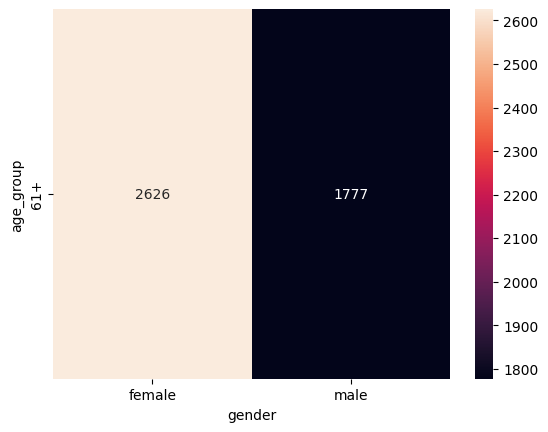

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(age_gender_table, annot=True, fmt='d')
plt.show()
